### 数据流水线中的方法实例化所在文件夹 ： D:\anaconda3\envs\pytorch_38\Lib\site-packages\mmengine\dataset\base_dataset.py   中的class Compose

### 单个读取文件的测试用例 

疯狂copy把类搬出来

In [1]:
# Copyright (c) OpenMMLab. All rights reserved.
import warnings
from typing import Optional

import mmengine.fileio as fileio
import numpy as np

import mmcv

# Copyright (c) OpenMMLab. All rights reserved.
from abc import ABCMeta, abstractmethod
from typing import Dict, List, Optional, Tuple, Union


from mmengine.registry import TRANSFORMS  # noqa: F401


class BaseTransform(metaclass=ABCMeta):
    """Base class for all transformations."""

    def __call__(self,
                 results: Dict) -> Optional[Union[Dict, Tuple[List, List]]]:

        return self.transform(results)

    @abstractmethod
    def transform(self,
                  results: Dict) -> Optional[Union[Dict, Tuple[List, List]]]:
        """The transform function. All subclass of BaseTransform should
        override this method.

        This function takes the result dict as the input, and can add new
        items to the dict or modify existing items in the dict. And the result
        dict will be returned in the end, which allows to concate multiple
        transforms into a pipeline.

        Args:
            results (dict): The result dict.

        Returns:
            dict: The result dict.
        """





@TRANSFORMS.register_module()
class LoadImageFromFile_zwbstypr(BaseTransform):
    """Load an image from file.

    Required Keys:

    - img_path

    Modified Keys:

    - img
    - img_shape
    - ori_shape

    Args:
        to_float32 (bool): Whether to convert the loaded image to a float32
            numpy array. If set to False, the loaded image is an uint8 array.
            Defaults to False.
        color_type (str): The flag argument for :func:`mmcv.imfrombytes`.
            Defaults to 'color'.
        imdecode_backend (str): The image decoding backend type. The backend
            argument for :func:`mmcv.imfrombytes`.
            See :func:`mmcv.imfrombytes` for details.
            Defaults to 'cv2'.
        file_client_args (dict, optional): Arguments to instantiate a
            FileClient. See :class:`mmengine.fileio.FileClient` for details.
            Defaults to None. It will be deprecated in future. Please use
            ``backend_args`` instead.
            Deprecated in version 2.0.0rc4.
        ignore_empty (bool): Whether to allow loading empty image or file path
            not existent. Defaults to False.
        backend_args (dict, optional): Instantiates the corresponding file
            backend. It may contain `backend` key to specify the file
            backend. If it contains, the file backend corresponding to this
            value will be used and initialized with the remaining values,
            otherwise the corresponding file backend will be selected
            based on the prefix of the file path. Defaults to None.
            New in version 2.0.0rc4.
    """

    def __init__(self,
                 to_float32: bool = False,
                 color_type: str = 'color',
                 imdecode_backend: str = 'cv2',
                 file_client_args: Optional[dict] = None,
                 ignore_empty: bool = False,
                 *,
                 backend_args: Optional[dict] = None) -> None:
        self.ignore_empty = ignore_empty
        self.to_float32 = to_float32
        self.color_type = color_type
        self.imdecode_backend = imdecode_backend

        self.file_client_args: Optional[dict] = None
        self.backend_args: Optional[dict] = None
        if file_client_args is not None:
            warnings.warn(
                '"file_client_args" will be deprecated in future. '
                'Please use "backend_args" instead', DeprecationWarning)
            if backend_args is not None:
                raise ValueError(
                    '"file_client_args" and "backend_args" cannot be set '
                    'at the same time.')

            self.file_client_args = file_client_args.copy()
        if backend_args is not None:
            self.backend_args = backend_args.copy()

    def transform(self, results: dict) -> Optional[dict]:
        """Functions to load image.

        Args:
            results (dict): Result dict from
                :class:`mmengine.dataset.BaseDataset`.

        Returns:
            dict: The dict contains loaded image and meta information.
        """

        filename = results['img_path']
        try:
            if self.file_client_args is not None:
                file_client = fileio.FileClient.infer_client(
                    self.file_client_args, filename)
                img_bytes = file_client.get(filename)
            else:
                img_bytes = fileio.get(
                    filename, backend_args=self.backend_args)
            img = mmcv.imfrombytes(
                img_bytes, flag=self.color_type, backend=self.imdecode_backend)
        except Exception as e:
            if self.ignore_empty:
                return None
            else:
                raise e
        # in some cases, images are not read successfully, the img would be
        # `None`, refer to https://github.com/open-mmlab/mmpretrain/issues/1427
        assert img is not None, f'failed to load image: {filename}'
        if self.to_float32:
            img = img.astype(np.float32)

        results['img'] = img
        results['img_shape'] = img.shape[:2]
        results['ori_shape'] = img.shape[:2]
        return results

    def __repr__(self):
        repr_str = (f'{self.__class__.__name__}('
                    f'ignore_empty={self.ignore_empty}, '
                    f'to_float32={self.to_float32}, '
                    f"color_type='{self.color_type}', "
                    f"imdecode_backend='{self.imdecode_backend}', ")

        if self.file_client_args is not None:
            repr_str += f'file_client_args={self.file_client_args})'
        else:
            repr_str += f'backend_args={self.backend_args})'

        return repr_str

### 上部分已经注册过了，查看自己是否确实注册上了

In [2]:
from mmengine.registry import TRANSFORMS 
TRANSFORMS

                                 Registry of transform                                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Names                      ┃ Objects                                                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ CenterCrop                 │ <class 'mmcv.transforms.processing.CenterCrop'>         │
│ Compose                    │ <class 'mmcv.transforms.wrappers.Compose'>              │
│ ImageToTensor              │ <class 'mmcv.transforms.formatting.ImageToTensor'>      │
│ KeyMapper                  │ <class 'mmcv.transforms.wrappers.KeyMapper'>            │
│ LoadAnnotations            │ <class 'mmcv.transforms.loading.LoadAnnotations'>       │
│ LoadImageFromFile          │ <class 'mmcv.transforms.loading.LoadImageFromFile'>     │
│ LoadImageFromFile_zwbstypr │ <class '__main__.LoadImageFromFile_zwbstypr'>           │
│ MultiScaleFlipAug  

### 模拟配置文件实例化

In [14]:
import numpy as np
from unittest.mock import patch, MagicMock
import unittest
import mmcv
from mmengine.fileio import FileClient

img_path =  rf'C:\Users\12997\Pictures\Saved Pictures\bqb.jpg'
# 模拟输入数据
results = {
    'img_path': img_path
}


### 模拟配置文件
cfg = {'type' : 'LoadImageFromFile_zwbstypr' , 'to_float32' : False, 'ignore_empty' : False}


transform_instance = TRANSFORMS.build(cfg)

### 使用注册器输出
output = transform_instance.transform(results)
output

{'img_path': 'C:\\Users\\12997\\Pictures\\Saved Pictures\\bqb.jpg',
 'img': array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255,

### 读取图像与标注文件测试用例

In [1]:
# Copyright (c) OpenMMLab. All rights reserved.
import warnings
from typing import Optional

import mmengine.fileio as fileio
import numpy as np

import mmcv



from mmengine.registry import TRANSFORMS  # noqa: F401




from abc import ABCMeta, abstractmethod
from typing import Dict, List, Optional, Tuple, Union
class BaseTransform(metaclass=ABCMeta):
    """Base class for all transformations."""

    def __call__(self,
                 results: Dict) -> Optional[Union[Dict, Tuple[List, List]]]:

        return self.transform(results)

    @abstractmethod
    def transform(self,
                  results: Dict) -> Optional[Union[Dict, Tuple[List, List]]]:
        """The transform function. All subclass of BaseTransform should
        override this method.

        This function takes the result dict as the input, and can add new
        items to the dict or modify existing items in the dict. And the result
        dict will be returned in the end, which allows to concate multiple
        transforms into a pipeline.

        Args:
            results (dict): The result dict.

        Returns:
            dict: The result dict.
        """



@TRANSFORMS.register_module()
class ZWBLoadImageFromFile(BaseTransform):
    """Load an image from file.

    Required Keys:

    - img_path

    Modified Keys:

    - img
    - img_shape
    - ori_shape

    Args:
        to_float32 (bool): Whether to convert the loaded image to a float32
            numpy array. If set to False, the loaded image is an uint8 array.
            Defaults to False.
        color_type (str): The flag argument for :func:`mmcv.imfrombytes`.
            Defaults to 'color'.
        imdecode_backend (str): The image decoding backend type. The backend
            argument for :func:`mmcv.imfrombytes`.
            See :func:`mmcv.imfrombytes` for details.
            Defaults to 'cv2'.
        file_client_args (dict, optional): Arguments to instantiate a
            FileClient. See :class:`mmengine.fileio.FileClient` for details.
            Defaults to None. It will be deprecated in future. Please use
            ``backend_args`` instead.
            Deprecated in version 2.0.0rc4.
        ignore_empty (bool): Whether to allow loading empty image or file path
            not existent. Defaults to False.
        backend_args (dict, optional): Instantiates the corresponding file
            backend. It may contain `backend` key to specify the file
            backend. If it contains, the file backend corresponding to this
            value will be used and initialized with the remaining values,
            otherwise the corresponding file backend will be selected
            based on the prefix of the file path. Defaults to None.
            New in version 2.0.0rc4.
    """

    def __init__(self,
                 to_float32: bool = False,
                 color_type: str = 'color',
                 imdecode_backend: str = 'cv2',
                 file_client_args: Optional[dict] = None,
                 ignore_empty: bool = False,
                 *,
                 backend_args: Optional[dict] = None) -> None:
        self.ignore_empty = ignore_empty
        self.to_float32 = to_float32
        self.color_type = color_type
        self.imdecode_backend = imdecode_backend

        self.file_client_args: Optional[dict] = None
        self.backend_args: Optional[dict] = None
        if file_client_args is not None:
            warnings.warn(
                '"file_client_args" will be deprecated in future. '
                'Please use "backend_args" instead', DeprecationWarning)
            if backend_args is not None:
                raise ValueError(
                    '"file_client_args" and "backend_args" cannot be set '
                    'at the same time.')

            self.file_client_args = file_client_args.copy()
        if backend_args is not None:
            self.backend_args = backend_args.copy()

    def transform(self, results: dict) -> Optional[dict]:
        """Functions to load image.

        Args:
            results (dict): Result dict from
                :class:`mmengine.dataset.BaseDataset`.

        Returns:
            dict: The dict contains loaded image and meta information.
        """

        filename = results['img_path']
        try:
            if self.file_client_args is not None:
                file_client = fileio.FileClient.infer_client(
                    self.file_client_args, filename)
                img_bytes = file_client.get(filename)
            else:
                img_bytes = fileio.get(
                    filename, backend_args=self.backend_args)
            img = mmcv.imfrombytes(
                img_bytes, flag=self.color_type, backend=self.imdecode_backend)
        except Exception as e:
            if self.ignore_empty:
                return None
            else:
                raise e
        # in some cases, images are not read successfully, the img would be
        # `None`, refer to https://github.com/open-mmlab/mmpretrain/issues/1427
        assert img is not None, f'failed to load image: {filename}'
        if self.to_float32:
            img = img.astype(np.float32)

        results['img'] = img
        results['img_shape'] = img.shape[:2]
        results['ori_shape'] = img.shape[:2]
        return results

    def __repr__(self):
        repr_str = (f'{self.__class__.__name__}('
                    f'ignore_empty={self.ignore_empty}, '
                    f'to_float32={self.to_float32}, '
                    f"color_type='{self.color_type}', "
                    f"imdecode_backend='{self.imdecode_backend}', ")

        if self.file_client_args is not None:
            repr_str += f'file_client_args={self.file_client_args})'
        else:
            repr_str += f'backend_args={self.backend_args})'

        return repr_str


@TRANSFORMS.register_module()
class ZWBLoadAnnotations(BaseTransform):
    """Load and process the ``instances`` and ``seg_map`` annotation provided
    by dataset.

    The annotation format is as the following:

    .. code-block:: python

        {
            'instances':
            [
                {
                # List of 4 numbers representing the bounding box of the
                # instance, in (x1, y1, x2, y2) order.
                'bbox': [x1, y1, x2, y2],

                # Label of image classification.
                'bbox_label': 1,

                # Used in key point detection.
                # Can only load the format of [x1, y1, v1,…, xn, yn, vn]. v[i]
                # means the visibility of this keypoint. n must be equal to the
                # number of keypoint categories.
                'keypoints': [x1, y1, v1, ..., xn, yn, vn]
                }
            ]
            # Filename of semantic or panoptic segmentation ground truth file.
            'seg_map_path': 'a/b/c'
        }

    After this module, the annotation has been changed to the format below:

    .. code-block:: python

        {
            # In (x1, y1, x2, y2) order, float type. N is the number of bboxes
            # in np.float32
            'gt_bboxes': np.ndarray(N, 4)
             # In np.int64 type.
            'gt_bboxes_labels': np.ndarray(N, )
             # In uint8 type.
            'gt_seg_map': np.ndarray (H, W)
             # with (x, y, v) order, in np.float32 type.
            'gt_keypoints': np.ndarray(N, NK, 3)
        }

    Required Keys:

    - instances

      - bbox (optional)
      - bbox_label
      - keypoints (optional)

    - seg_map_path (optional)

    Added Keys:

    - gt_bboxes (np.float32)
    - gt_bboxes_labels (np.int64)
    - gt_seg_map (np.uint8)
    - gt_keypoints (np.float32)

    Args:
        with_bbox (bool): Whether to parse and load the bbox annotation.
            Defaults to True.
        with_label (bool): Whether to parse and load the label annotation.
            Defaults to True.
        with_seg (bool): Whether to parse and load the semantic segmentation
            annotation. Defaults to False.
        with_keypoints (bool): Whether to parse and load the keypoints
            annotation. Defaults to False.
        imdecode_backend (str): The image decoding backend type. The backend
            argument for :func:`mmcv.imfrombytes`.
            See :func:`mmcv.imfrombytes` for details.
            Defaults to 'cv2'.
        file_client_args (dict, optional): Arguments to instantiate a
            FileClient. See :class:`mmengine.fileio.FileClient` for details.
            Defaults to None. It will be deprecated in future. Please use
            ``backend_args`` instead.
            Deprecated in version 2.0.0rc4.
        backend_args (dict, optional): Instantiates the corresponding file
            backend. It may contain `backend` key to specify the file
            backend. If it contains, the file backend corresponding to this
            value will be used and initialized with the remaining values,
            otherwise the corresponding file backend will be selected
            based on the prefix of the file path. Defaults to None.
            New in version 2.0.0rc4.
    """

    def __init__(
        self,
        with_bbox: bool = True,
        with_label: bool = True,
        with_seg: bool = False,
        with_keypoints: bool = False,
        imdecode_backend: str = 'cv2',
        file_client_args: Optional[dict] = None,
        *,
        backend_args: Optional[dict] = None,
    ) -> None:
        super().__init__()
        self.with_bbox = with_bbox
        self.with_label = with_label
        self.with_seg = with_seg
        self.with_keypoints = with_keypoints
        self.imdecode_backend = imdecode_backend

        self.file_client_args: Optional[dict] = None
        self.backend_args: Optional[dict] = None
        if file_client_args is not None:
            warnings.warn(
                '"file_client_args" will be deprecated in future. '
                'Please use "backend_args" instead', DeprecationWarning)
            if backend_args is not None:
                raise ValueError(
                    '"file_client_args" and "backend_args" cannot be set '
                    'at the same time.')

            self.file_client_args = file_client_args.copy()
        if backend_args is not None:
            self.backend_args = backend_args.copy()

    def _load_bboxes(self, results: dict) -> None:
        """Private function to load bounding box annotations.

        Args:
            results (dict): Result dict from
                :class:`mmengine.dataset.BaseDataset`.

        Returns:
            dict: The dict contains loaded bounding box annotations.
        """
        gt_bboxes = []
        for instance in results['instances']:
            gt_bboxes.append(instance['bbox'])
        results['gt_bboxes'] = np.array(
            gt_bboxes, dtype=np.float32).reshape(-1, 4)

    def _load_labels(self, results: dict) -> None:
        """Private function to load label annotations.

        Args:
            results (dict): Result dict from
                :class:`mmengine.dataset.BaseDataset`.

        Returns:
            dict: The dict contains loaded label annotations.
        """
        gt_bboxes_labels = []
        for instance in results['instances']:
            gt_bboxes_labels.append(instance['bbox_label'])
        results['gt_bboxes_labels'] = np.array(
            gt_bboxes_labels, dtype=np.int64)

    def _load_seg_map(self, results: dict) -> None:
        """Private function to load semantic segmentation annotations.

        Args:
            results (dict): Result dict from
                :class:`mmengine.dataset.BaseDataset`.

        Returns:
            dict: The dict contains loaded semantic segmentation annotations.
        """
        if self.file_client_args is not None:
            file_client = fileio.FileClient.infer_client(
                self.file_client_args, results['seg_map_path'])
            img_bytes = file_client.get(results['seg_map_path'])
        else:
            img_bytes = fileio.get(
                results['seg_map_path'], backend_args=self.backend_args)

        results['gt_seg_map'] = mmcv.imfrombytes(
            img_bytes, flag='unchanged',
            backend=self.imdecode_backend).squeeze()

    def _load_kps(self, results: dict) -> None:
        """Private function to load keypoints annotations.

        Args:
            results (dict): Result dict from
                :class:`mmengine.dataset.BaseDataset`.

        Returns:
            dict: The dict contains loaded keypoints annotations.
        """
        gt_keypoints = []
        for instance in results['instances']:
            gt_keypoints.append(instance['keypoints'])
        results['gt_keypoints'] = np.array(gt_keypoints, np.float32).reshape(
            (len(gt_keypoints), -1, 3))

    def transform(self, results: dict) -> dict:
        """Function to load multiple types annotations.

        Args:
            results (dict): Result dict from
                :class:`mmengine.dataset.BaseDataset`.

        Returns:
            dict: The dict contains loaded bounding box, label and
            semantic segmentation and keypoints annotations.
        """

        if self.with_bbox:
            self._load_bboxes(results)
        if self.with_label:
            self._load_labels(results)
        if self.with_seg:
            self._load_seg_map(results)
        if self.with_keypoints:
            self._load_kps(results)
        return results

    def __repr__(self) -> str:
        repr_str = self.__class__.__name__
        repr_str += f'(with_bbox={self.with_bbox}, '
        repr_str += f'with_label={self.with_label}, '
        repr_str += f'with_seg={self.with_seg}, '
        repr_str += f'with_keypoints={self.with_keypoints}, '
        repr_str += f"imdecode_backend='{self.imdecode_backend}', "

        if self.file_client_args is not None:
            repr_str += f'file_client_args={self.file_client_args})'
        else:
            repr_str += f'backend_args={self.backend_args})'

        return repr_str


In [23]:
import numpy as np
from unittest.mock import patch, MagicMock
import unittest
import mmcv
from mmengine.fileio import FileClient
seg_map_path1 =  rf'D:\code\Watermelon87_Semantic_Seg_Mask\ann_dir\train\04_35-2.png'
seg_map_path2 = rf'D:\code\Watermelon87_Semantic_Seg_Mask\img_dir\labels_my-project-name_2025-06-22-05-20-29.json'

# 模拟输入数据
results = {
    'img_path': rf'D:\code\Watermelon87_Semantic_Seg_Mask\img_dir\train\04_35-2.jpg' ,
    'seg_map_path': seg_map_path2
    
}


### 模拟配置文件
cfg = {'type' : 'ZWBLoadImageFromFile' , 'to_float32' : False, 'ignore_empty' : False}


transform_instance = TRANSFORMS.build(cfg)

### 使用注册器输出
LoadImageFromFileoutput = transform_instance.transform(results)
LoadImageFromFileoutput

{'img_path': 'D:\\code\\Watermelon87_Semantic_Seg_Mask\\img_dir\\train\\04_35-2.jpg',
 'seg_map_path': 'D:\\code\\Watermelon87_Semantic_Seg_Mask\\ann_dir\\train\\04_35-2.png',
 'img': array([[[133, 123, 243],
         [133, 123, 243],
         [132, 123, 244],
         ...,
         [141, 183, 226],
         [140, 182, 225],
         [140, 182, 225]],
 
        [[133, 123, 243],
         [133, 122, 244],
         [132, 123, 244],
         ...,
         [141, 183, 226],
         [140, 182, 225],
         [140, 182, 225]],
 
        [[132, 121, 243],
         [132, 121, 243],
         [131, 121, 245],
         ...,
         [141, 182, 227],
         [140, 181, 226],
         [140, 181, 226]],
 
        ...,
 
        [[160, 195, 238],
         [159, 194, 237],
         [156, 194, 236],
         ...,
         [142, 175, 220],
         [142, 175, 220],
         [142, 175, 220]],
 
        [[160, 195, 239],
         [159, 194, 238],
         [156, 193, 237],
         ...,
         [141, 176

In [30]:
from mmengine.registry import TRANSFORMS
# import mmcv
from mmengine import fileio



### 模拟配置文件
cfg = {'type': 'ZWBLoadAnnotations', 'with_bbox': False, 'with_label': False, 'with_seg': True, 'with_keypoints': False}

# 如果 'TRANSFORMS' 中有问题，确保模块加载正确
transform_instance = TRANSFORMS.build(cfg)

### 使用注册器输出
LoadAnnotationsOutput = transform_instance.transform(LoadImageFromFileoutput)


In [31]:
LoadAnnotationsOutput.keys()

dict_keys(['img_path', 'seg_map_path', 'img', 'img_shape', 'ori_shape', 'gt_seg_map'])

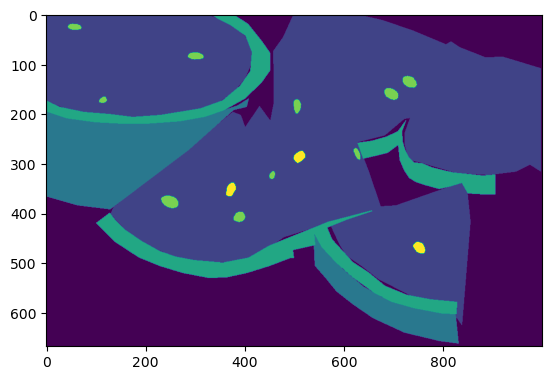

In [32]:
import matplotlib.pyplot as plt
plt.imshow(LoadAnnotationsOutput['gt_seg_map'])

### 整个获取读取文件夹的数据集测试用例

In [2]:
# Copyright (c) OpenMMLab. All rights reserved.
import os.path as osp
from os import PathLike
from typing import List, Optional, Sequence, Union

import mmengine
import numpy as np
from mmengine.dataset import BaseDataset as _BaseDataset

from mmpretrain.registry import DATASETS, TRANSFORMS


def expanduser(path):
    """Expand ~ and ~user constructions.

    If user or $HOME is unknown, do nothing.
    """
    if isinstance(path, (str, PathLike)):
        return osp.expanduser(path)
    else:
        return path


@DATASETS.register_module()
class BaseDataset(_BaseDataset):
    """Base dataset for image classification task.

    This dataset support annotation file in `OpenMMLab 2.0 style annotation
    format`.

    .. _OpenMMLab 2.0 style annotation format:
        https://github.com/open-mmlab/mmengine/blob/main/docs/zh_cn/tutorials/basedataset.md

    Comparing with the :class:`mmengine.BaseDataset`, this class implemented
    several useful methods.

    Args:
        ann_file (str): Annotation file path.
        metainfo (dict, optional): Meta information for dataset, such as class
            information. Defaults to None.
        data_root (str): The root directory for ``data_prefix`` and
            ``ann_file``. Defaults to ''.
        data_prefix (str | dict): Prefix for training data. Defaults to ''.
        filter_cfg (dict, optional): Config for filter data. Defaults to None.
        indices (int or Sequence[int], optional): Support using first few
            data in annotation file to facilitate training/testing on a smaller
            dataset. Defaults to None, which means using all ``data_infos``.
        serialize_data (bool): Whether to hold memory using serialized objects,
            when enabled, data loader workers can use shared RAM from master
            process instead of making a copy. Defaults to True.
        pipeline (Sequence): Processing pipeline. Defaults to an empty tuple.
        test_mode (bool, optional): ``test_mode=True`` means in test phase,
            an error will be raised when getting an item fails, ``test_mode=False``
            means in training phase, another item will be returned randomly.
            Defaults to False.
        lazy_init (bool): Whether to load annotation during instantiation.
            In some cases, such as visualization, only the meta information of
            the dataset is needed, which is not necessary to load annotation
            file. ``Basedataset`` can skip load annotations to save time by set
            ``lazy_init=False``. Defaults to False.
        max_refetch (int): If ``Basedataset.prepare_data`` get a None img.
            The maximum extra number of cycles to get a valid image.
            Defaults to 1000.
        classes (str | Sequence[str], optional): Specify names of classes.

            - If is string, it should be a file path, and the every line of
              the file is a name of a class.
            - If is a sequence of string, every item is a name of class.
            - If is None, use categories information in ``metainfo`` argument,
              annotation file or the class attribute ``METAINFO``.

            Defaults to None.
    """  # noqa: E501

    def __init__(self,
                 ann_file: str,
                 metainfo: Optional[dict] = None,
                 data_root: str = '',
                 data_prefix: Union[str, dict] = '',
                 filter_cfg: Optional[dict] = None,
                 indices: Optional[Union[int, Sequence[int]]] = None,
                 serialize_data: bool = True,
                 pipeline: Sequence = (),
                 test_mode: bool = False,
                 lazy_init: bool = False,
                 max_refetch: int = 1000,
                 classes: Union[str, Sequence[str], None] = None):
        if isinstance(data_prefix, str):
            data_prefix = dict(img_path=expanduser(data_prefix))

        ann_file = expanduser(ann_file)
        metainfo = self._compat_classes(metainfo, classes)

        transforms = []
        for transform in pipeline:
            if isinstance(transform, dict):
                transforms.append(TRANSFORMS.build(transform))
            else:
                transforms.append(transform)

        super().__init__(
            ann_file=ann_file,
            metainfo=metainfo,
            data_root=data_root,
            data_prefix=data_prefix,
            filter_cfg=filter_cfg,
            indices=indices,
            serialize_data=serialize_data,
            pipeline=transforms,
            test_mode=test_mode,
            lazy_init=lazy_init,
            max_refetch=max_refetch)

    @property
    def img_prefix(self):
        """The prefix of images."""
        return self.data_prefix['img_path']

    @property
    def CLASSES(self):
        """Return all categories names."""
        return self._metainfo.get('classes', None)

    @property
    def class_to_idx(self):
        """Map mapping class name to class index.

        Returns:
            dict: mapping from class name to class index.
        """

        return {cat: i for i, cat in enumerate(self.CLASSES)}

    def get_gt_labels(self):
        """Get all ground-truth labels (categories).

        Returns:
            np.ndarray: categories for all images.
        """

        gt_labels = np.array(
            [self.get_data_info(i)['gt_label'] for i in range(len(self))])
        return gt_labels

    def get_cat_ids(self, idx: int) -> List[int]:
        """Get category id by index.

        Args:
            idx (int): Index of data.

        Returns:
            cat_ids (List[int]): Image category of specified index.
        """

        return [int(self.get_data_info(idx)['gt_label'])]

    def _compat_classes(self, metainfo, classes):
        """Merge the old style ``classes`` arguments to ``metainfo``."""
        if isinstance(classes, str):
            # take it as a file path
            class_names = mmengine.list_from_file(expanduser(classes))
        elif isinstance(classes, (tuple, list)):
            class_names = classes
        elif classes is not None:
            raise ValueError(f'Unsupported type {type(classes)} of classes.')

        if metainfo is None:
            metainfo = {}

        if classes is not None:
            metainfo = {'classes': tuple(class_names), **metainfo}

        return metainfo

    def full_init(self):
        """Load annotation file and set ``BaseDataset._fully_initialized`` to
        True."""
        super().full_init()

        #  To support the standard OpenMMLab 2.0 annotation format. Generate
        #  metainfo in internal format from standard metainfo format.
        if 'categories' in self._metainfo and 'classes' not in self._metainfo:
            categories = sorted(
                self._metainfo['categories'], key=lambda x: x['id'])
            self._metainfo['classes'] = tuple(
                [cat['category_name'] for cat in categories])

    def __repr__(self):
        """Print the basic information of the dataset.

        Returns:
            str: Formatted string.
        """
        head = 'Dataset ' + self.__class__.__name__
        body = []
        if self._fully_initialized:
            body.append(f'Number of samples: \t{self.__len__()}')
        else:
            body.append("Haven't been initialized")

        if self.CLASSES is not None:
            body.append(f'Number of categories: \t{len(self.CLASSES)}')

        body.extend(self.extra_repr())

        if len(self.pipeline.transforms) > 0:
            body.append('With transforms:')
            for t in self.pipeline.transforms:
                body.append(f'    {t}')

        lines = [head] + [' ' * 4 + line for line in body]
        return '\n'.join(lines)

    def extra_repr(self) -> List[str]:
        """The extra repr information of the dataset."""
        body = []
        body.append(f'Annotation file: \t{self.ann_file}')
        body.append(f'Prefix of images: \t{self.img_prefix}')
        return body


In [ ]:
# Copyright (c) OpenMMLab. All rights reserved.
from typing import Callable, Dict, List, Optional, Sequence, Tuple, Union

from mmengine.fileio import (BaseStorageBackend, get_file_backend,
                             list_from_file)
from mmengine.logging import MMLogger

from mmpretrain.registry import DATASETS



def find_folders(
    root: str,
    backend: Optional[BaseStorageBackend] = None
) -> Tuple[List[str], Dict[str, int]]:
    """Find classes by folders under a root.

    Args:
        root (string): root directory of folders
        backend (BaseStorageBackend | None): The file backend of the root.
            If None, auto infer backend from the root path. Defaults to None.

    Returns:
        Tuple[List[str], Dict[str, int]]:

        - folders: The name of sub folders under the root.
        - folder_to_idx: The map from folder name to class idx.
    """
    # Pre-build file backend to prevent verbose file backend inference.
    backend = backend or get_file_backend(root, enable_singleton=True)
    folders = list(
        backend.list_dir_or_file(
            root,
            list_dir=True,
            list_file=False,
            recursive=False,
        ))
    folders.sort()
    folder_to_idx = {folders[i]: i for i in range(len(folders))}
    return folders, folder_to_idx


def get_samples(
    root: str,
    folder_to_idx: Dict[str, int],
    is_valid_file: Callable,
    backend: Optional[BaseStorageBackend] = None,
):
    """Make dataset by walking all images under a root.

    Args:
        root (string): root directory of folders
        folder_to_idx (dict): the map from class name to class idx
        is_valid_file (Callable): A function that takes path of a file
            and check if the file is a valid sample file.
        backend (BaseStorageBackend | None): The file backend of the root.
            If None, auto infer backend from the root path. Defaults to None.

    Returns:
        Tuple[list, set]:

        - samples: a list of tuple where each element is (image, class_idx)
        - empty_folders: The folders don't have any valid files.
    """
    samples = []
    available_classes = set()
    # Pre-build file backend to prevent verbose file backend inference.
    backend = backend or get_file_backend(root, enable_singleton=True)

    if folder_to_idx is not None:
        for folder_name in sorted(list(folder_to_idx.keys())):
            _dir = backend.join_path(root, folder_name)
            files = backend.list_dir_or_file(
                _dir,
                list_dir=False,
                list_file=True,
                recursive=True,
            )
            for file in sorted(list(files)):
                if is_valid_file(file):
                    path = backend.join_path(folder_name, file)
                    item = (path, folder_to_idx[folder_name])
                    samples.append(item)
                    available_classes.add(folder_name)
        empty_folders = set(folder_to_idx.keys()) - available_classes
    else:
        files = backend.list_dir_or_file(
            root,
            list_dir=False,
            list_file=True,
            recursive=True,
        )
        samples = [file for file in sorted(list(files)) if is_valid_file(file)]
        empty_folders = None

    return samples, empty_folders


@DATASETS.register_module()
class CustomDataset(BaseDataset):
    """A generic dataset for multiple tasks.

    The dataset supports two kinds of style.

    1. Use an annotation file to specify all samples, and each line indicates a
       sample:

       The annotation file (for ``with_label=True``, supervised tasks.): ::

           folder_1/xxx.png 0
           folder_1/xxy.png 1
           123.png 4
           nsdf3.png 3
           ...

       The annotation file (for ``with_label=False``, unsupervised tasks.): ::

           folder_1/xxx.png
           folder_1/xxy.png
           123.png
           nsdf3.png
           ...

       Sample files: ::

           data_prefix/
           ├── folder_1
           │   ├── xxx.png
           │   ├── xxy.png
           │   └── ...
           ├── 123.png
           ├── nsdf3.png
           └── ...

       Please use the argument ``metainfo`` to specify extra information for
       the task, like ``{'classes': ('bird', 'cat', 'deer', 'dog', 'frog')}``.

    2. Place all samples in one folder as below:

       Sample files (for ``with_label=True``, supervised tasks, we use the name
       of sub-folders as the categories names): ::

           data_prefix/
           ├── class_x
           │   ├── xxx.png
           │   ├── xxy.png
           │   └── ...
           │       └── xxz.png
           └── class_y
               ├── 123.png
               ├── nsdf3.png
               ├── ...
               └── asd932_.png

       Sample files (for ``with_label=False``, unsupervised tasks, we use all
       sample files under the specified folder): ::

           data_prefix/
           ├── folder_1
           │   ├── xxx.png
           │   ├── xxy.png
           │   └── ...
           ├── 123.png
           ├── nsdf3.png
           └── ...

    If the ``ann_file`` is specified, the dataset will be generated by the
    first way, otherwise, try the second way.

    Args:
        data_root (str): The root directory for ``data_prefix`` and
            ``ann_file``. Defaults to ''.
        data_prefix (str | dict): Prefix for the data. Defaults to ''.
        ann_file (str): Annotation file path. Defaults to ''.
        with_label (bool): Whether the annotation file includes ground truth
            labels, or use sub-folders to specify categories.
            Defaults to True.
        extensions (Sequence[str]): A sequence of allowed extensions. Defaults
            to ('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif').
        metainfo (dict, optional): Meta information for dataset, such as class
            information. Defaults to None.
        lazy_init (bool): Whether to load annotation during instantiation.
            In some cases, such as visualization, only the meta information of
            the dataset is needed, which is not necessary to load annotation
            file. ``Basedataset`` can skip load annotations to save time by set
            ``lazy_init=False``. Defaults to False.
        **kwargs: Other keyword arguments in :class:`BaseDataset`.
    """

    def __init__(self,
                 data_root: str = '',
                 data_prefix: Union[str, dict] = '',
                 ann_file: str = '',
                 with_label=True,
                 extensions: Sequence[str] = ('.jpg', '.jpeg', '.png', '.ppm',
                                              '.bmp', '.pgm', '.tif'),
                 metainfo: Optional[dict] = None,
                 lazy_init: bool = False,
                 **kwargs):
        assert (ann_file or data_prefix or data_root), \
            'One of `ann_file`, `data_root` and `data_prefix` must '\
            'be specified.'

        self.extensions = tuple(set([i.lower() for i in extensions]))
        self.with_label = with_label

        super().__init__(
            # The base class requires string ann_file but this class doesn't
            ann_file=ann_file,
            metainfo=metainfo,
            data_root=data_root,
            data_prefix=data_prefix,
            # Force to lazy_init for some modification before loading data.
            lazy_init=True,
            **kwargs)

        # Full initialize the dataset.
        if not lazy_init:
            self.full_init()

    def _find_samples(self):
        """find samples from ``data_prefix``."""
        if self.with_label:
            classes, folder_to_idx = find_folders(self.img_prefix)
            samples, empty_classes = get_samples(
                self.img_prefix,
                folder_to_idx,
                is_valid_file=self.is_valid_file,
            )

            self.folder_to_idx = folder_to_idx

            if self.CLASSES is not None:
                assert len(self.CLASSES) == len(classes), \
                    f"The number of subfolders ({len(classes)}) doesn't " \
                    f'match the number of specified classes ' \
                    f'({len(self.CLASSES)}). Please check the data folder.'
            else:
                self._metainfo['classes'] = tuple(classes)
        else:
            samples, empty_classes = get_samples(
                self.img_prefix,
                None,
                is_valid_file=self.is_valid_file,
            )

        if len(samples) == 0:
            raise RuntimeError(
                f'Found 0 files in subfolders of: {self.data_prefix}. '
                f'Supported extensions are: {",".join(self.extensions)}')

        if empty_classes:
            logger = MMLogger.get_current_instance()
            logger.warning(
                'Found no valid file in the folder '
                f'{", ".join(empty_classes)}. '
                f"Supported extensions are: {', '.join(self.extensions)}")

        return samples

    def load_data_list(self):
        """Load image paths and gt_labels."""
        if not self.ann_file:
            samples = self._find_samples()
        elif self.with_label:
            lines = list_from_file(self.ann_file)
            samples = [x.strip().rsplit(' ', 1) for x in lines]
        else:
            samples = list_from_file(self.ann_file)

        # Pre-build file backend to prevent verbose file backend inference.
        backend = get_file_backend(self.img_prefix, enable_singleton=True)
        data_list = []
        for sample in samples:
            if self.with_label:
                filename, gt_label = sample
                img_path = backend.join_path(self.img_prefix, filename)
                info = {'img_path': img_path, 'gt_label': int(gt_label)}
            else:
                img_path = backend.join_path(self.img_prefix, sample)
                info = {'img_path': img_path}
            data_list.append(info)
        return data_list

    def is_valid_file(self, filename: str) -> bool:
        """Check if a file is a valid sample."""
        return filename.lower().endswith(self.extensions)